<a href="https://colab.research.google.com/github/drewwint/Learning/blob/main/ab_testing_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AB Testing Hands on Exercises

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("poster")
sns.set_style("whitegrid")
%config InlineBackend.figure_format='retina'
import pymc as pm
import arviz as az
import numpy
import pymc

np.set_printoptions(formatter={'float': lambda x: "{0:0.1f}%".format(x)})

## Exercise 1

1. Build a model for estimating the conversion rate for version B of the website
  * We included Model A for you already
2. Extract the posterior of plausible values of the conversion rate.
3. Plot a histogram of plausible values for the conversion rate of version A *and* version B.
4. Compute the probability that version A of the website is better than that of version B.

In [2]:
np.random.seed(3)
a = sps.bernoulli(p=.1)
b = sps.bernoulli(p=.15)

conversions = a_conversions = a.rvs(100)
b_conversions = b.rvs(100)

## Solution 1

In [3]:
with pm.Model():
    conversion_rate = pm.Beta("conversion_rate_a", 2, 10)
    how_likely = pm.Bernoulli("how_likely",
                              p=conversion_rate,
                              observed=a_conversions)

    idata_a = pm.sample()

Output()

In [4]:
conversion_a = idata_a.posterior.stack(draws=("chain", "draw"))["conversion_rate_a"].values

### Conversion B

In [5]:
with pm.Model():
    conversion_rate = pm.Beta("conversion_rate_b", 2, 10)
    how_likely = pm.Bernoulli("how_likely",
                              p=conversion_rate,
                              observed=b_conversions)

    idata_b = pm.sample()

Output()

In [6]:
conversion_b = idata_b.posterior.stack(draws=("chain", "draw"))["conversion_rate_b"].values

## Plotting

Text(0.5, 1.0, 'Conversion A')

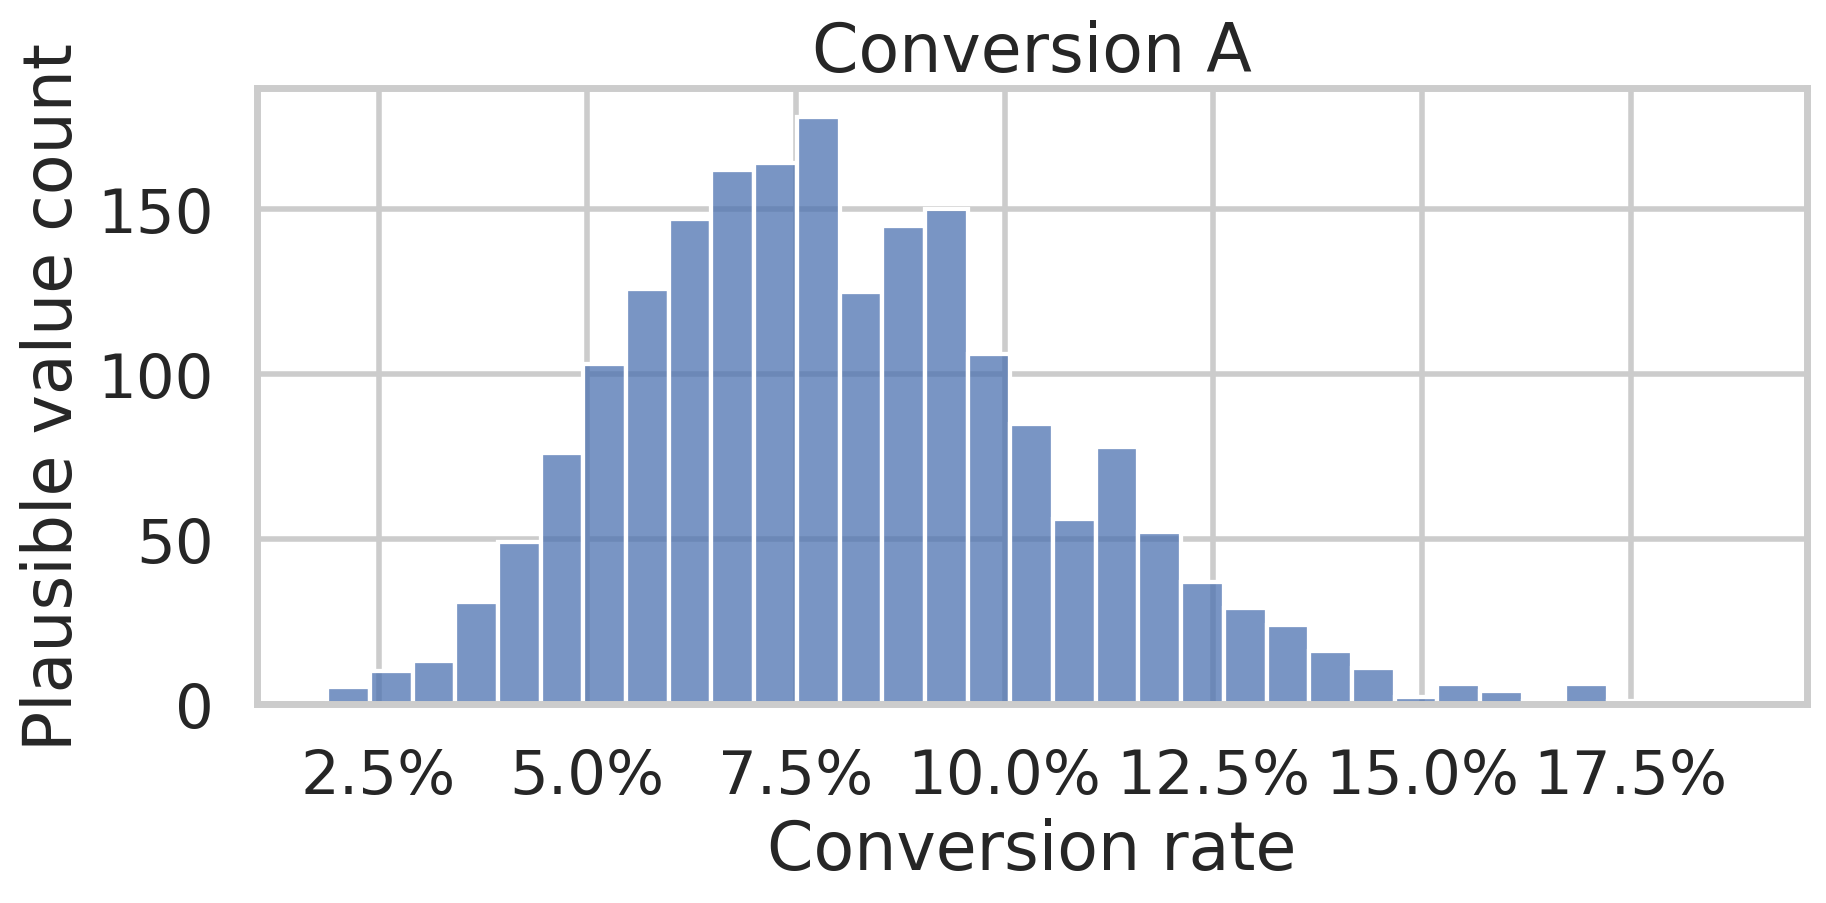

In [7]:

plt.figure(figsize=(10, 4))
ax = sns.histplot(conversion_a)
ax.set_xlabel("Conversion rate")
ax.set_ylabel("Plausible value count")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title("Conversion A")



Text(0.5, 1.0, 'Conversion B')

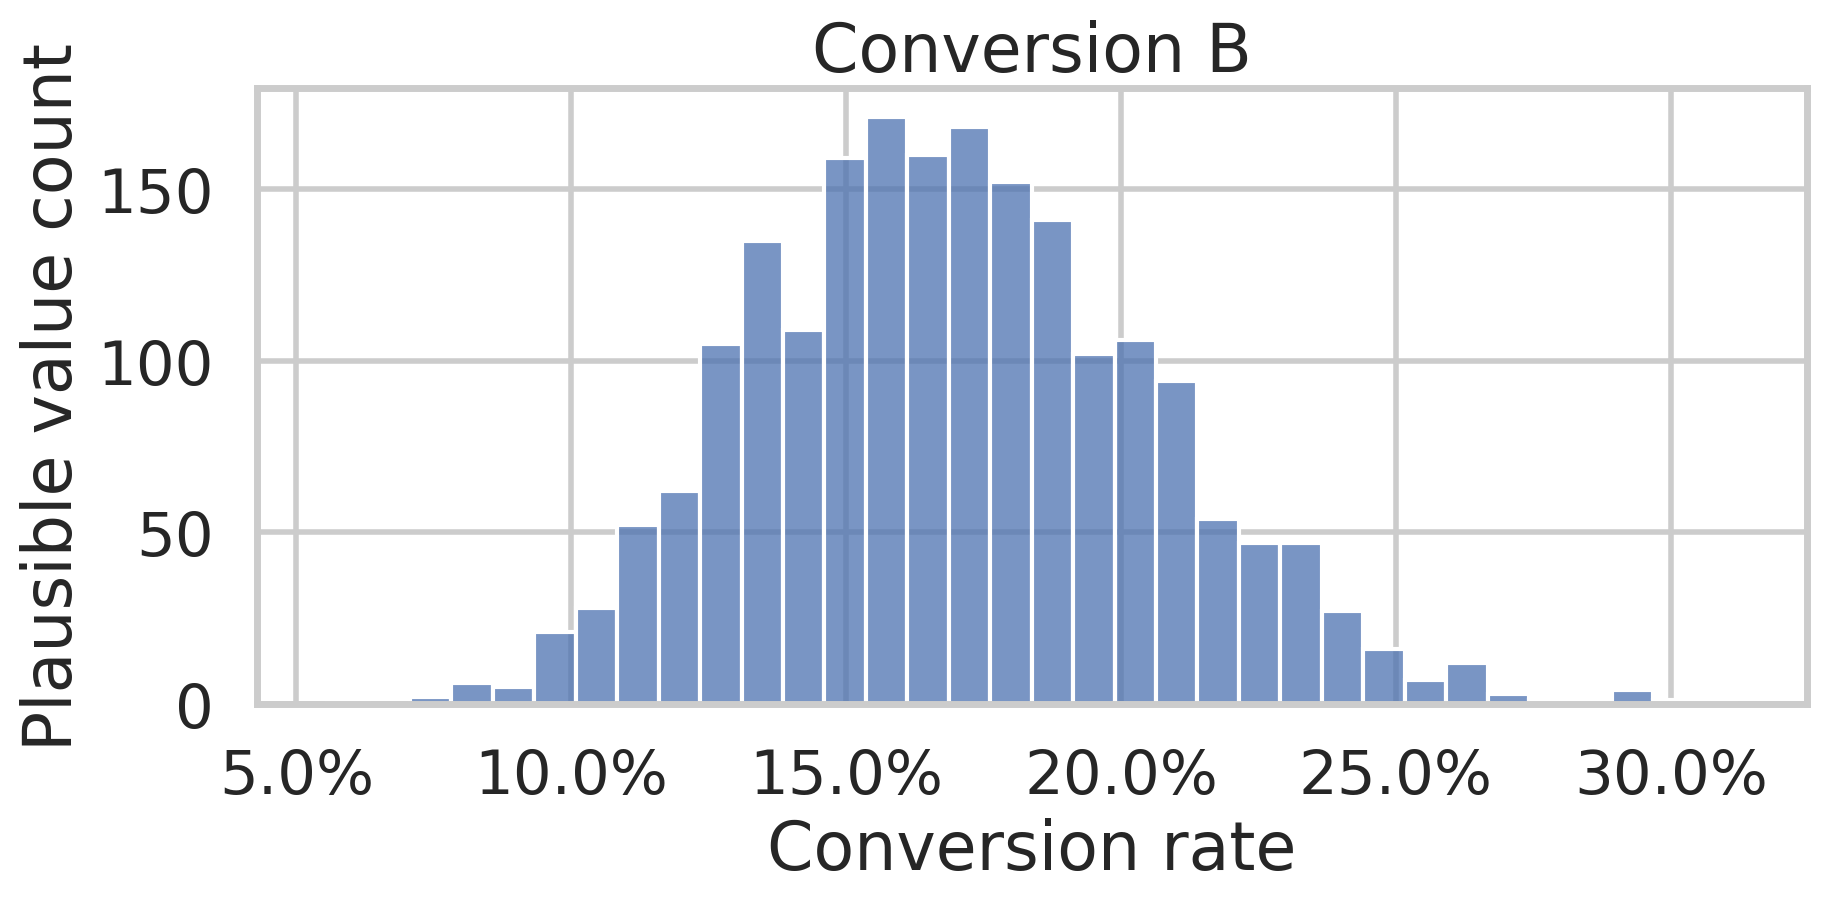

In [8]:

plt.figure(figsize=(10, 4))
ax = sns.histplot(conversion_b)
ax.set_xlabel("Conversion rate")
ax.set_ylabel("Plausible value count")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title("Conversion B")



In [9]:
# Probability that B works better than A
np.mean(conversion_a < conversion_b)

np.float64(0.9815)

## Exercise 2

Instead of a `Bernoulli` likelihood, which is the likelihood for binary data, we can also code the data differently and use a different likelihood. Instead of 100 binary events, we can also just say how many conversions we observed out of how many visitors (for version A: 7 out of 100).

Note that we can't always do this, but here we can because we do not care about the order with which the data came in (i.e. shuffling would not change our inferences).

The likelihood for successes out of a specific number of trials is the `Binomial`. Use the [documentation on the `Binomial`](https://docs.pymc.io/en/latest/api/distributions/generated/pymc.Binomial.html#pymc.Binomial) to figure out what to pass in instead of the binary events.

## Solution 2

In [10]:
a_conversions.sum()
b_conversions.sum()

np.int64(17)

In [11]:
import pymc as pm

with pm.Model() as model_a:
  conversion_rate = pm.Beta("conversion_rate_a", 2, 10)
  how_likely = pm.Binomial("how_likely",
                           n = len(a_conversions),
                           p=conversion_rate,
                           observed=a_conversions.sum()) # we use sum here because the Binomial distribution models the number of successes in n independent trials, with success probability p
  bdata_a = pm.sample()

Output()

In [12]:
b_conversion_a = bdata_a.posterior.stack(draws=("chain", "draw"))["conversion_rate_a"].values

Text(0.5, 1.0, 'Conversion A')

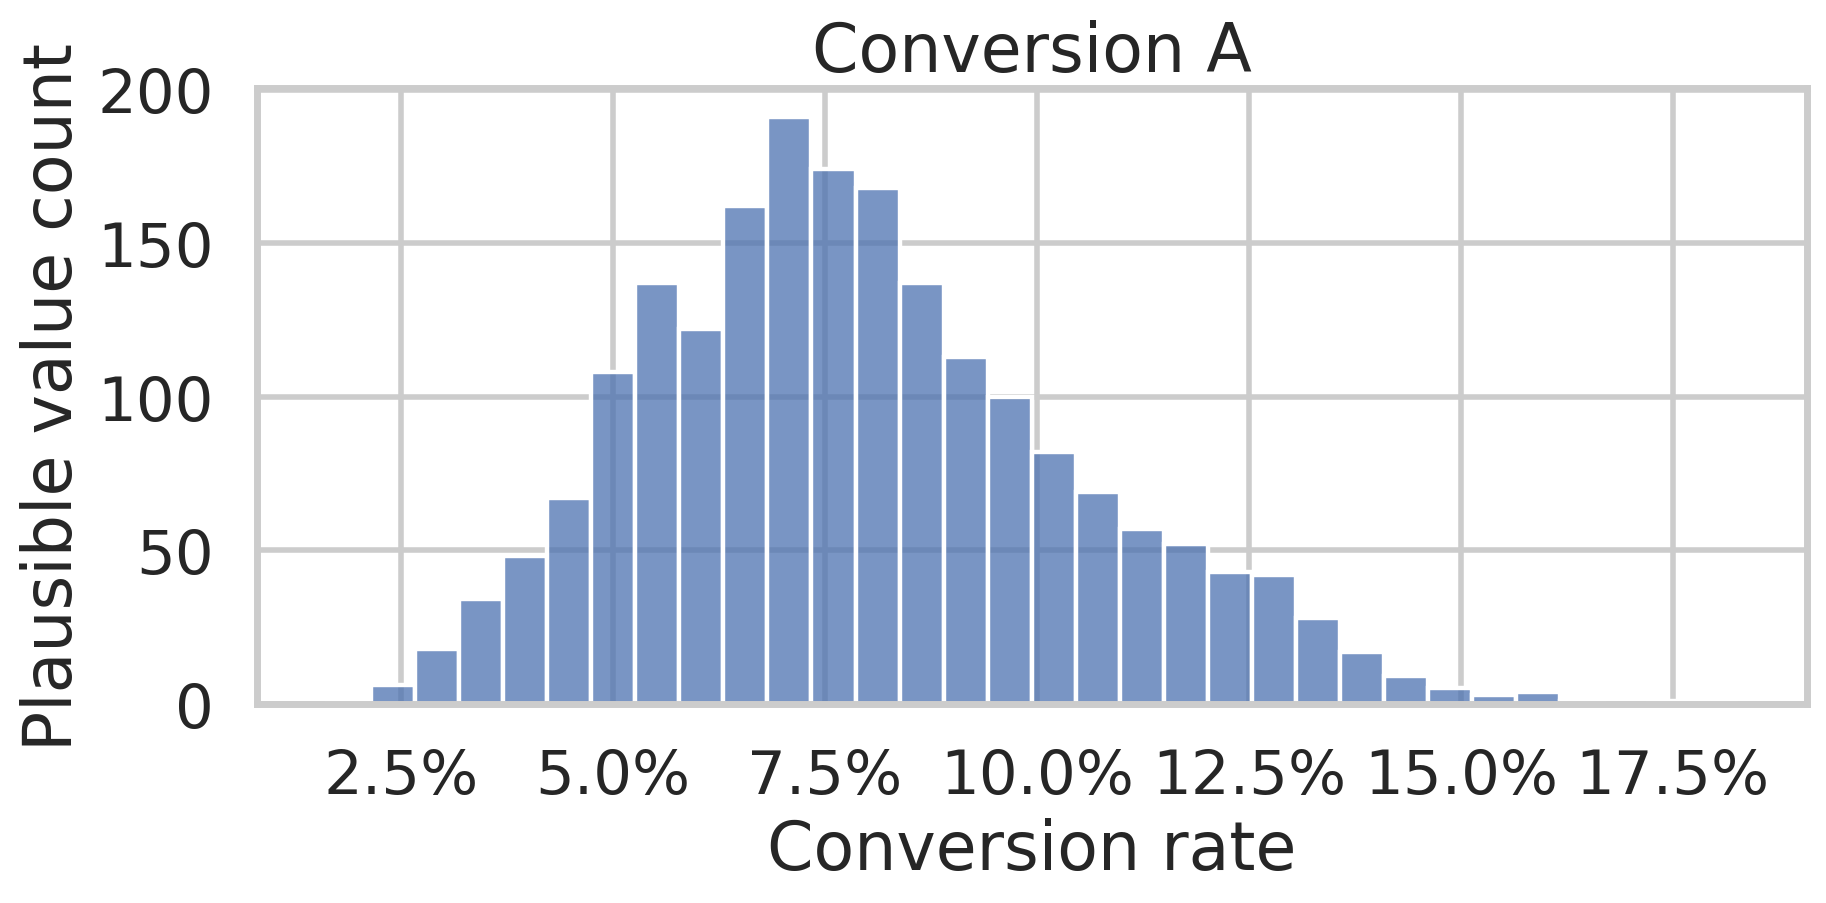

In [13]:

plt.figure(figsize=(10, 4))
ax = sns.histplot(b_conversion_a)
ax.set_xlabel("Conversion rate")
ax.set_ylabel("Plausible value count")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title("Conversion A")



In [14]:
import pymc as pm

with pm.Model() as model_b:
  conversion_rate = pm.Beta("conversion_rate_b", 2, 10)
  how_likely = pm.Binomial("how_likely",
                           n = len(b_conversions),
                           p=conversion_rate,
                           observed=b_conversions.sum()) # we use sum here because the Binomial distribution models the number of successes in n independent trials, with success probability p
  bdata_b = pm.sample()

Output()

In [15]:
b_conversion_b = bdata_b.posterior.stack(draws=("chain", "draw"))["conversion_rate_b"].values

Text(0.5, 1.0, 'Conversion A')

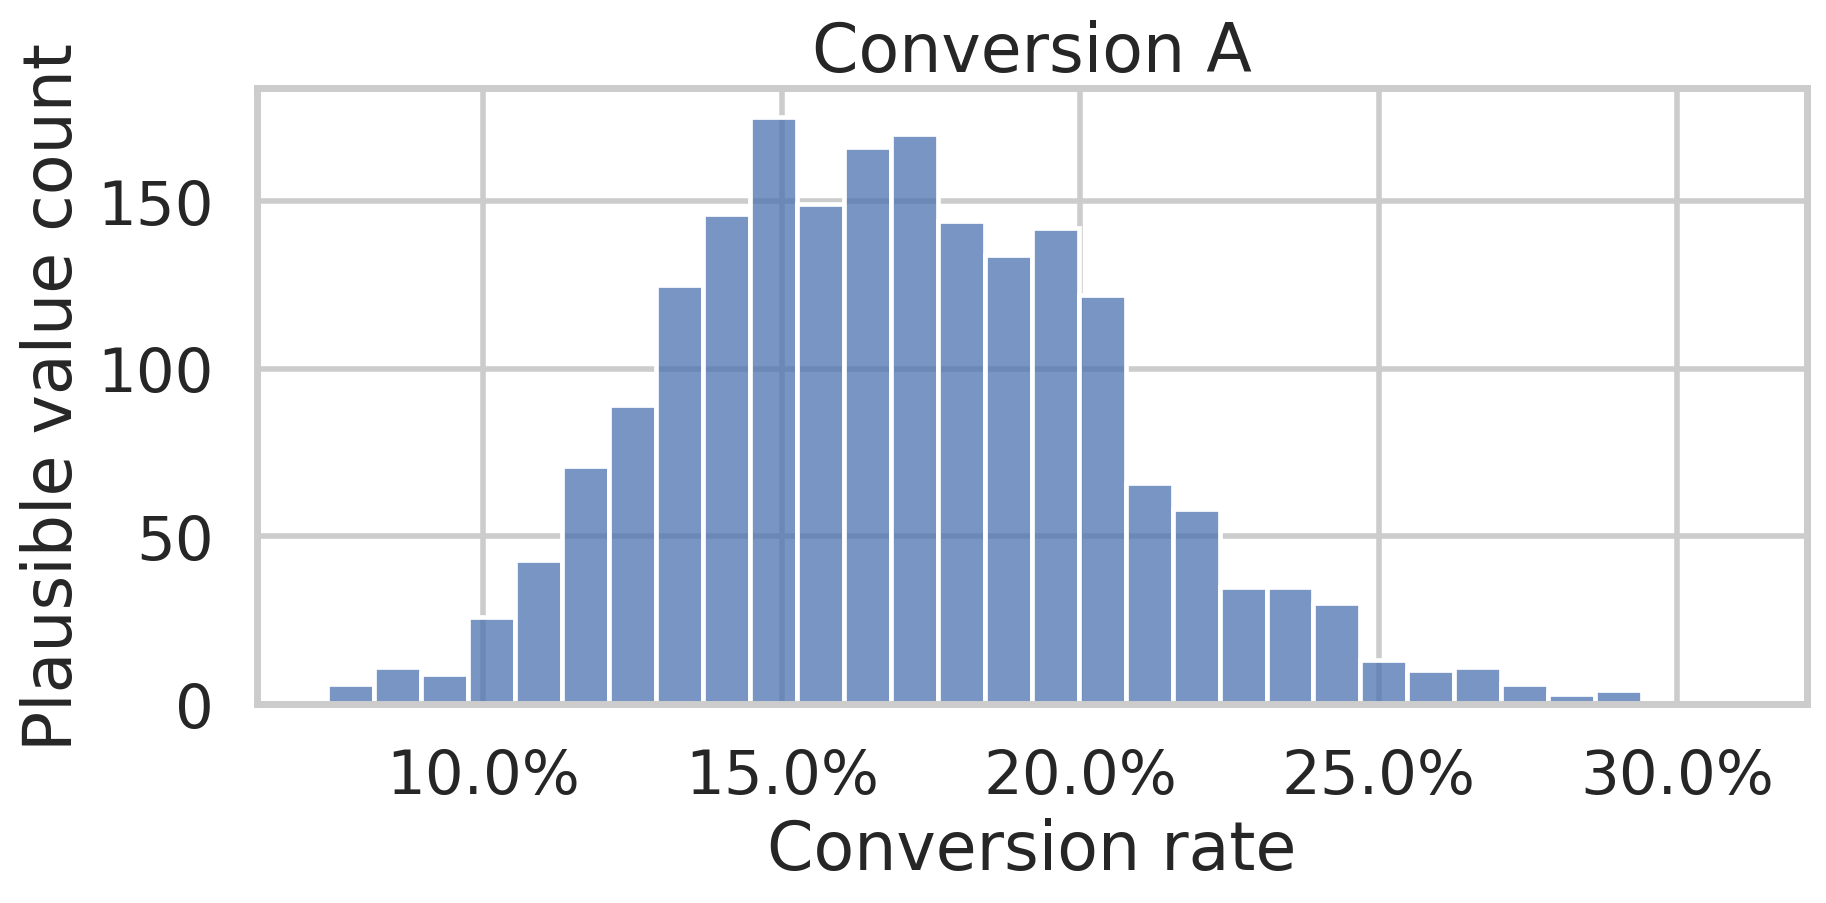

In [16]:

plt.figure(figsize=(10, 4))
ax = sns.histplot(b_conversion_b)
ax.set_xlabel("Conversion rate")
ax.set_ylabel("Plausible value count")
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title("Conversion A")

